In this Lab, the time series data was loaded from a CSV file and the 'Open' column was obtained as a pandas Series object using data['Open']. The y variable was then passed to the auto_arima function to find the optimal order (p, d, q) and seasonal order (P, D, Q, s) for a seasonal ARIMA model. The seasonal parameter was set to True to indicate that seasonality was being modeled, the m parameter was set to the number of time steps in each seasonal cycle (in this example, 12 for monthly data), and the stepwise parameter was set to True to perform a stepwise search for the best combination of (p, d, q, P, D, Q, s). The suppress_warnings parameter was set to True to suppress warning messages. The optimal order was stored in the order variable and the optimal seasonal order was stored in the seasonal_order variable.

An instance of the ARIMA class was then created from the statsmodels.tsa.arima.model module, specifying the y variable as the input, the optimal order obtained from auto_arima, and the optimal seasonal order obtained from auto_arima. The ARIMA model was fit to the data using the fit() method of the ARIMA class, and the results were stored in the results variable.

The performance of the model was evaluated using the mean_absolute_error(), mean_squared_error(), and np.sqrt() functions to calculate MAE, MSE, and RMSE, respectively. The values of these metrics were then printed.

Finally, the original time series and the fitted values were plotted using the plot() method of the matplotlib.pyplot module. The x-axis label was set to 'Date', the y-axis label was set to 'Value', and a legend was added to the plot using the set_xlabel(), set_ylabel(), and legend() methods, respectively. The plot was shown using the show() function.

**Import Libraries**

In [ ]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

<ipython-input-1-91c20af04b1a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


**Load the Data**

In [ ]:
gold_data = pd.read_csv("XAUUSD.csv", header=1)

what are the features?

In [ ]:
gold_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object')

---
In the gold price dataset,

**Date:** Represents the date on which the gold price is recorded.

**Open Price:** The price of the commodity at the beginning of the trading day.

**High Price:** The highest price that the commodity reaches during the trading
day.

**Low Price:** The lowest price that the commodity reaches during the trading day.

**Close Price:** The final price of the commodity at the end of the trading day.

**Change(Pips):** Represents the change in the gold price in 'pips' between the current day and the previous day. A pip represents the smallest possible price change in the gold price.

**Change(%):** Represents the percentage change in the gold price between the current day and the previous day.

---


In [ ]:
print("Data shape:", gold_data.shape)
print("Data types:\n", gold_data.dtypes)
print("Data summary:\n", gold_data.describe())
print("Data Information:\n", gold_data.info())

Data shape: (622, 7)
Data types:
 Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)      int64
Change(%)       float64
dtype: object
Data summary:
               Open         High          Low        Close  Change(Pips)  \
count   622.000000   622.000000   622.000000   622.000000    622.000000   
mean   1833.470354  1844.208939  1822.538248  1833.592749     12.239550   
std      94.417731    95.163303    93.223079    94.345885   1480.617616   
min    1627.270000  1640.760000  1615.040000  1626.890000  -5559.000000   
25%    1775.080000  1787.085000  1765.435000  1774.957500   -704.000000   
50%    1815.230000  1826.375000  1808.335000  1815.470000     11.500000   
75%    1913.792500  1924.717500  1896.670000  1914.700000    749.500000   
max    2052.780000  2071.320000  2030.770000  2051.930000   6612.000000   

        Change(%)  
count  622.000000  
mean     0.003617  
std      0.804528  
min     -3.05

**Notes:**

* A positive value in the 'Change(Pips)' column **indicates** that the gold price has increased from the previous day, while a negative value indicates that it has decreased. This column is useful for analyzing the volatility of the gold price and identifying trends and patterns in price movements.

*  The 'Change(%)' column is also useful for analyzing the volatility of the gold price and identifying trends and patterns in price movements. By calculating the percentage change in the gold price over different time periods, we can gain insights into the behavior of the market and make predictions about future prices.

* I will use the 'Close' column as the gold price because it is a commonly used metric for the price of commodities, including gold.





In [ ]:
# Convert the date column to a datetime object and set it as the index
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data = gold_data.set_index('Date')

In [ ]:
gold_data

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2023-07-04,1921.07,1930.22,1920.34,1929.65,858,0.44
2023-07-03,1917.70,1930.50,1910.11,1921.17,347,0.18
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260,-0.14
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049,0.55
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...
2021-07-08,1803.29,1818.00,1793.90,1803.75,46,0.03
2021-07-07,1795.28,1809.50,1793.41,1803.22,794,0.44
2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27


**Resampling:**

* To reduce the noise in the data: The gold price data can be quite volatile and can have a lot of noise. By resampling the data to a lower frequency, such as monthly, we can reduce the noise in the data and make it easier to identify trends and patterns.

* To make the data more manageable: The original gold price data had daily frequency, which can be quite large and difficult to work with. By resampling the data to a lower frequency, we can reduce the size of the data and make it more manageable for analysis.


Here we Resampled data to Monthly, we can also resample it in weeks by 'W' or Days 'D' or even years by using 'Y' instead of 'M' in the cell below!

In [ ]:
# Resample the data to monthly frequency and calculate the mean
resampled_monthly = gold_data.resample('M').mean().dropna()
resampled_monthly

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-31,1806.070000,1814.512500,1798.400417,1807.131250,106.125000,0.057083
2021-08-31,1785.374074,1794.892593,1773.330370,1785.393704,1.962963,-0.004074
2021-09-30,1780.585000,1789.510000,1769.835000,1778.029615,-255.538462,-0.146154
2021-10-31,1774.471923,1784.048462,1766.313462,1775.497692,102.576923,0.056154
2021-11-30,1819.928800,1830.565200,1808.555200,1819.414400,-51.440000,-0.031200
2021-12-31,1791.921600,1800.358400,1784.722400,1793.924000,200.240000,0.110000
2022-01-31,1816.762400,1824.035600,1807.206400,1815.672800,-108.960000,-0.062400
2022-02-28,1857.067500,1871.657500,1847.735833,1861.653333,458.583333,0.245417
2022-03-31,1951.481852,1966.462222,1933.054815,1952.484444,100.259259,0.045926


The order of an **ARIMA** model, represented as (p, d, q), can take a wide range of values. The specific values of p, d, and q to use for a given time series depend on the characteristics of the data and the research question.

* p is the order of the autoregressive (AR)
component
* d is the degree of differencing required to make the time series stationary
* q is the order of the moving average (MA) component

**statsmodels.tsa.arima.model** module, specifying an order of (1,1,1) for the ARIMA model. This specifies that we want to fit an ARIMA model with a first-order difference, an autoregressive term of order 1, and a moving average term of order 1.

In [ ]:
# Select the 'Price' column as the input variable
y = resampled_monthly['Open']
# Fit the ARIMA model
# Fit a SARIMAX(1,1,1) model to the input variable
model = sm.tsa.SARIMAX(y, order=(1,1,1), seasonal_order=(0,0,0,0))
#model = sm.tsa.SARIMAX(y, order=(0,1,0), seasonal_order=(0,0,0,12))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -129.894
Date:                Wed, 12 Jul 2023   AIC                            265.787
Time:                        05:31:55   BIC                            269.322
Sample:                    07-31-2021   HQIC                           266.725
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2581      0.986      0.262      0.793      -1.674       2.190
ma.L1         -0.0951      0.985     -0.097      0.923      -2.026       1.836
sigma2      2936.2424   1418.968      2.069      0.0

We then fit the SARIMAX model to the input variable using the fit() method of the SARIMAX class, which returns an instance of the SARIMAXResults class. We store the results in the results variable.

**Visualization**

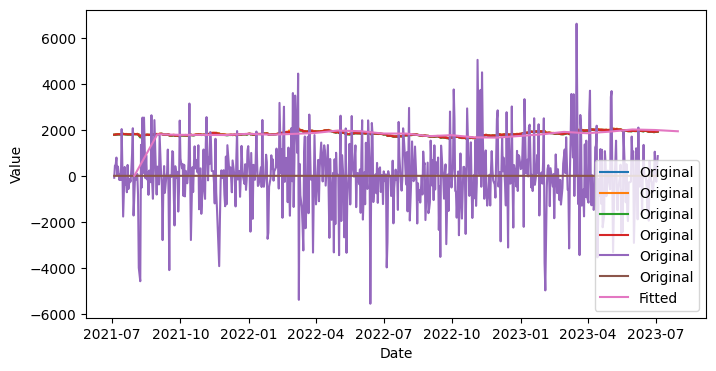

In [ ]:
# Plot the original time series and the fitted values
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(gold_data, label='Original')
ax.plot(results.fittedvalues, label='Fitted')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [ ]:
# Evaluate the performance of the model using MAE, MSE, and RMSE
y_pred = results.predict()
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 115.94228310901435
MSE: 133296.37028314878
RMSE: 365.097754420852


In this lab: [link text](https://colab.research.google.com/drive/1zm4nYW0N_KJtc4L--e4gGQWd15mD2IJB?usp=sharing) I tried to find optimal values for ARIMA which is: (0,1,0)



Now I use the optimal values!
It also seems like the original data is noisy to reduce noise, this time we change Monthly frequency to Daily.


In [ ]:
# Resample the data to daily frequency and calculate the mean
resampled_daily = gold_data.resample('D').mean().dropna()
resampled_daily

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.22,1787.73,1785.00,1786.39,-83.0,-0.05
2021-07-05,1786.68,1794.00,1783.80,1791.15,447.0,0.25
2021-07-06,1790.85,1814.89,1789.89,1795.68,483.0,0.27
2021-07-07,1795.28,1809.50,1793.41,1803.22,794.0,0.44
2021-07-08,1803.29,1818.00,1793.90,1803.75,46.0,0.03
...,...,...,...,...,...,...
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71.0,-0.04
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049.0,0.55
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260.0,-0.14


In [ ]:
# Select the 'Price' column as the input variable
y = resampled_daily['Close']
# Fit the ARIMA model
# Fit a SARIMAX(1,1,1) model to the input variable
model = sm.tsa.SARIMAX(resampled_daily['Open'], order=(0,1,0), seasonal_order=(0,0,0,0))
results2 = model.fit()

# Print the model summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  622
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2554.139
Date:                Wed, 12 Jul 2023   AIC                           5110.277
Time:                        05:23:20   BIC                           5114.708
Sample:                             0   HQIC                          5111.999
                                - 622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       218.7709      9.204     23.769      0.000     200.731     236.811
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                69.60
Prob(Q):                              0.79   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


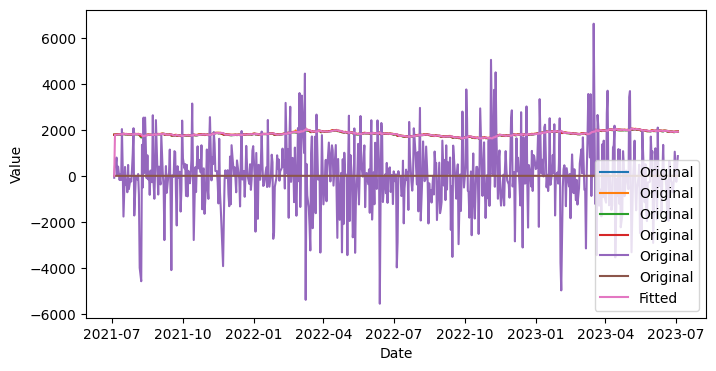

In [ ]:
# Plot the original time series and the fitted values
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(gold_data, label='Original')
ax.plot(results2.fittedvalues, label='Fitted')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [ ]:
# Evaluate the performance of the model using MAE, MSE, and RMSE
y_pred = results2.predict()
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


MAE: 18.395401929260448
MSE: 5564.452572990355
RMSE: 74.59525838141694
